# Assignment Day 21
## Logistic Regression - Attrition

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn  as sns

%matplotlib inline
import math

In [58]:
data = pd.read_csv('general_data.csv')
data.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,No,Travel_Rarely,Sales,6,2,Life Sciences,1,1,Female,...,1.0,Y,11,8,0,1.0,6,1,0,0
1,31,Yes,Travel_Frequently,Research & Development,10,1,Life Sciences,1,2,Female,...,0.0,Y,23,8,1,6.0,3,5,1,4
2,32,No,Travel_Frequently,Research & Development,17,4,Other,1,3,Male,...,1.0,Y,15,8,3,5.0,2,5,0,3
3,38,No,Non-Travel,Research & Development,2,5,Life Sciences,1,4,Male,...,3.0,Y,11,8,3,13.0,5,8,7,5
4,32,No,Travel_Rarely,Research & Development,10,1,Medical,1,5,Male,...,4.0,Y,12,8,2,9.0,2,6,0,4


In [3]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeID                   int64
Gender                      object
JobLevel                     int64
JobRole                     object
MaritalStatus               object
MonthlyIncome                int64
NumCompaniesWorked         float64
Over18                      object
PercentSalaryHike            int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears          float64
TrainingTimesLastYear        int64
YearsAtCompany               int64
YearsSinceLastPromotion      int64
YearsWithCurrManager         int64
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4410 entries, 0 to 4409
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      4410 non-null   int64  
 1   Attrition                4410 non-null   object 
 2   BusinessTravel           4410 non-null   object 
 3   Department               4410 non-null   object 
 4   DistanceFromHome         4410 non-null   int64  
 5   Education                4410 non-null   int64  
 6   EducationField           4410 non-null   object 
 7   EmployeeCount            4410 non-null   int64  
 8   EmployeeID               4410 non-null   int64  
 9   Gender                   4410 non-null   object 
 10  JobLevel                 4410 non-null   int64  
 11  JobRole                  4410 non-null   object 
 12  MaritalStatus            4410 non-null   object 
 13  MonthlyIncome            4410 non-null   int64  
 14  NumCompaniesWorked      

In [5]:
data.describe()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
count,4410.000000,4410.000000,4410.000000,4410.0,4410.000000,4410.000000,4410.000000,4391.000000,4410.000000,4410.0,4410.000000,4401.000000,4410.000000,4410.000000,4410.000000,4410.000000
mean,36.923810,9.192517,2.912925,1.0,2205.500000,2.063946,65029.312925,2.694830,15.209524,8.0,0.793878,11.279936,2.799320,7.008163,2.187755,4.123129
std,9.133301,8.105026,1.023933,0.0,1273.201673,1.106689,47068.888559,2.498887,3.659108,0.0,0.851883,7.782222,1.288978,6.125135,3.221699,3.567327
min,18.000000,1.000000,1.000000,1.0,1.000000,1.000000,10090.000000,0.000000,11.000000,8.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,2.000000,2.000000,1.0,1103.250000,1.000000,29110.000000,1.000000,12.000000,8.0,0.000000,6.000000,2.000000,3.000000,0.000000,2.000000
50%,36.000000,7.000000,3.000000,1.0,2205.500000,2.000000,49190.000000,2.000000,14.000000,8.0,1.000000,10.000000,3.000000,5.000000,1.000000,3.000000
75%,43.000000,14.000000,4.000000,1.0,3307.750000,3.000000,83800.000000,4.000000,18.000000,8.0,1.000000,15.000000,3.000000,9.000000,3.000000,7.000000
max,60.000000,29.000000,5.000000,1.0,4410.000000,5.000000,199990.000000,9.000000,25.000000,8.0,3.000000,40.000000,6.000000,40.000000,15.000000,17.000000


In [7]:
data.corr()

,Age,DistanceFromHome,Education,EmployeeCount,EmployeeID,JobLevel,MonthlyIncome,NumCompaniesWorked,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.006963,-0.035706,NaN,0.008649,-0.002884,-0.044314,0.299243,-0.033137,NaN,-0.031753,0.680661,-0.027308,0.311309,0.216513,0.202089
DistanceFromHome,0.006963,1.000000,-0.008638,NaN,-0.001097,-0.037329,-0.021607,-0.013843,0.038125,NaN,0.011169,0.009374,-0.009001,0.031684,0.002290,0.021584
Education,-0.035706,-0.008638,1.000000,NaN,-0.009680,0.045746,0.006410,-0.016250,-0.040531,NaN,0.001261,-0.010717,0.010472,0.006080,0.022490,0.005358
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeID,0.008649,-0.001097,-0.009680,NaN,1.000000,-0.003303,0.007338,-0.001117,-0.004456,NaN,-0.014254,-0.001063,-0.010191,0.004086,0.000256,0.008579
JobLevel,-0.002884,-0.037329,0.045746,NaN,-0.003303,1.000000,0.047316,-0.009875,0.010973,NaN,0.000993,-0.036957,-0.032500,-0.064219,-0.060811,-0.055251
MonthlyIncome,-0.044314,-0.021607,0.006410,NaN,0.007338,0.047316,1.000000,-0.020726,0.004325,NaN,0.026930,-0.033787,0.050112,0.000995,0.065219,0.024304
NumCompaniesWorked,0.299243,-0.013843,-0.016250,NaN,-0.001117,-0.009875,-0.020726,1.000000,0.030860,NaN,0.017163,0.238807,-0.032286,-0.117959,-0.036656,-0.109667
PercentSalaryHike,-0.033137,0.038125,-0.040531,NaN,-0.004456,0.010973,0.004325,0.030860,1.000000,NaN,0.012548,-0.018736,-0.037392,-0.029707,-0.029542,-0.040864
StandardHours,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
data.size

105840

# Analyzing Data

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001705E552488>,
      dtype=object)

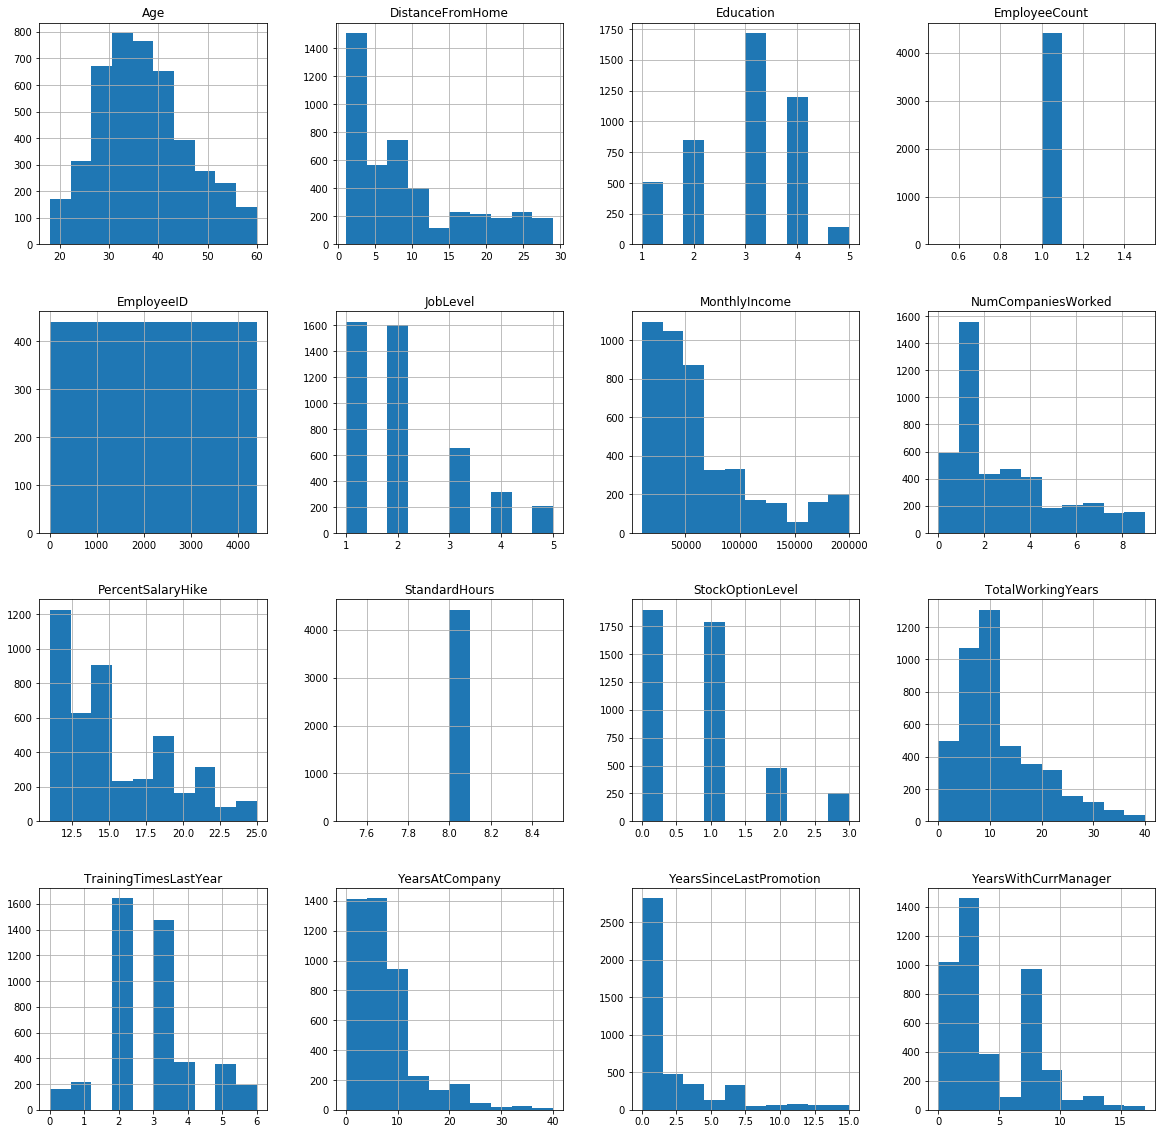

In [9]:
data.hist(figsize=(20,20))

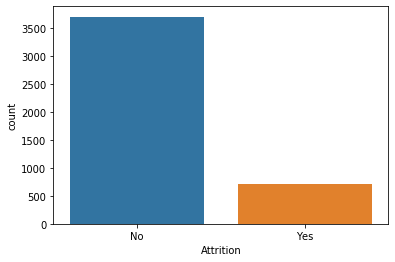

In [10]:
sns.countplot(x = 'Attrition', data=data)

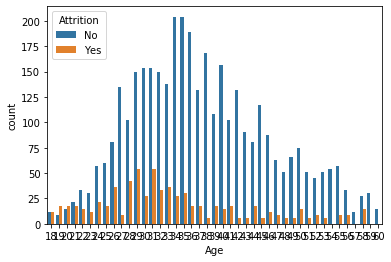

In [11]:
sns.countplot(x ='Age',hue='Attrition',data=data)

# Check NaN & fill

In [12]:
data.isnull().head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeID,Gender,...,NumCompaniesWorked,Over18,PercentSalaryHike,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
data.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeID                  0
Gender                      0
JobLevel                    0
JobRole                     0
MaritalStatus               0
MonthlyIncome               0
NumCompaniesWorked         19
Over18                      0
PercentSalaryHike           0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           9
TrainingTimesLastYear       0
YearsAtCompany              0
YearsSinceLastPromotion     0
YearsWithCurrManager        0
dtype: int64

In [14]:
data.isna().sum().sum()

28

In [96]:
# Filling NaN value

data = data.fillna(data.mean())

In [121]:
data.isna().sum().sum()

0

In [59]:
data.drop(['BusinessTravel','Department','EducationField','JobRole','MaritalStatus','Over18'],axis=1,inplace=True)

In [112]:
data.drop(['NumCompaniesWorked','TotalWorkingYears'],axis=1,inplace=True)

In [113]:
data.head()

,Age,Attrition,DistanceFromHome,Education,EmployeeCount,EmployeeID,Gender,JobLevel,MonthlyIncome,PercentSalaryHike,StandardHours,StockOptionLevel,TrainingTimesLastYear,YearsAtCompany,YearsSinceLastPromotion,YearsWithCurrManager
0,51,0,6,2,1,1,0,1,131160,11,8,0,6,1,0,0
1,31,1,10,1,1,2,0,1,41890,23,8,1,3,5,1,4
2,32,0,17,4,1,3,1,4,193280,15,8,3,2,5,0,3
3,38,0,2,5,1,4,1,3,83210,11,8,3,5,8,7,5
4,32,0,10,1,1,5,1,1,23420,12,8,2,2,6,0,4


In [66]:
# Coverting str into int

from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
data['Attrition'] = label_encoder.fit_transform(data['Attrition'])
data['Attrition'].head()

0    0
1    1
2    0
3    0
4    0
Name: Attrition, dtype: int32

In [84]:
label_encoder = preprocessing.LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])
data['Gender'].head()

0    0
1    0
2    1
3    1
4    1
Name: Gender, dtype: int64

# Split x & y

In [128]:
y = data['Attrition']
x = data[['Age','DistanceFromHome','Education','MonthlyIncome','JobLevel','PercentSalaryHike']]

In [76]:
y.head()

0    0
1    1
2    0
3    0
4    0
Name: Attrition, dtype: int32

In [129]:
x.head()

,Age,DistanceFromHome,Education,MonthlyIncome,JobLevel,PercentSalaryHike
0,51,6,2,131160,1,11
1,31,10,1,41890,1,23
2,32,17,4,193280,4,15
3,38,2,5,83210,3,11
4,32,10,1,23420,1,12


# Train

In [143]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [144]:
data1 = sc.fit_transform(data)
data1

array([[ 1.54136892, -0.4384223 , -0.39393818, ..., -0.98101416,
        -0.67914568, -1.15593471],
       [-0.64866811,  2.28090588,  0.09963874, ..., -0.32789332,
        -0.36871529, -0.03451975],
       [-0.53916626, -0.4384223 ,  0.96339837, ..., -0.32789332,
        -0.67914568, -0.31487349],
       ...,
       [-1.30567922, -0.4384223 ,  1.95055222, ..., -0.49117353,
        -0.36871529, -0.59522723],
       [ 0.55585225, -0.4384223 ,  1.0867926 , ...,  0.32522752,
         1.49386709,  1.08689522],
       [ 0.33684855, -0.4384223 ,  2.32073492, ...,  2.28459003,
         0.25214551,  1.36724896]])

In [145]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 1)

In [146]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

In [147]:
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [148]:
ypred = log_reg.predict(x_test)
ypred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [149]:
from sklearn.metrics import classification_report

In [150]:
classification_report(y_test,ypred)

C:\Users\Noor Alam\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.82      1.00      0.90       720\n           1       0.00      0.00      0.00       162\n\n    accuracy                           0.82       882\n   macro avg       0.41      0.50      0.45       882\nweighted avg       0.67      0.82      0.73       882\n'

In [151]:
from sklearn.metrics import confusion_matrix

In [152]:
confusion_matrix(y_test,ypred)

array([[720,   0],
       [162,   0]], dtype=int64)

In [153]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,ypred)

0.8163265306122449